(sec-ajusteLineal)=
# Ajuste lineal de datos experimentales
En muchas ocasiones la información de interés se encuentra codificada en los datos experimentales, en forma de la pendiente o el intercepto de la línea que se ajusta a dichos datos. El método que se usa para determinar los parámetros de pendiente e intercepto de la línea se conoce como **método de mínimos cuadrados**, que será estudiado en la {numref}`sec-minimosCuad`. Por ahora sólo se hará uso del resultado del método. Sean los valores de la variable independiente $x_i$, dependiente $y_i$, y la ecuación de una línea recta $y = mx + c$, el método de mínimos cuadrados dice que

$$ c = \frac{\sum_i x_i^2 \sum_i y_i - \sum_i x_i \sum_i x_i y_i}{\Delta} $$ (ec-intercepto)

con una incertidumbre igual a

$$ \alpha_c = \alpha_{ic}\sqrt{\frac{\sum_i x_i^2}{\Delta}}, $$ (ec-eIntercepto)

$$ m = \frac{N\sum_i x_i y_i - \sum_i x_i \sum_i y_i}{\Delta} $$ (ec-pendiente)

con una incertidumbre igual a 

$$ \alpha_m = \alpha_{ic}\sqrt{\frac{N}{\Delta}}, $$ (ec-ePendiente)

donde $N$ es el número total de datos,

$$ \Delta = N \sum_i x_i^2 - \bigg( \sum_i x_i \bigg)^2,$$ (ec-Delta)

y $\alpha_{ic}$ es la incertidumbre común [^incComun] definida como

$$ \alpha_{ic} = \sqrt{\frac{1}{N-2}\sum_i (y_i - mx_i - c)^2}. $$ (ec-incertidumbreComun)


[^incComun]: La incertidumbre común se puede entender como la incertidumbre que deberían tener todos los valores experimentales para que la curva encontrada sea realmente la curva que mejor se ajusta a ellos.

(subsec-ejemploBola4)=
## Ejemplo: bola rodando (parte 4)[^ejemplo]
De la {numref}`fig-bola3` el investigador deduce que la bola si se está desacelerando de forma constante. El interés final del investigador es encontrar un valor de desaceleración con su respectiva incertidumbre. Una forma directa es dibujar de forma manual sobre la gráfica una línea recta que esté lo más equidistante de los datos experimentales, para luego determinar su pendiente, que en este caso corresponde a la desaceleración. Para determinar de esta forma la incertidumbre se deben dibujar líneas rectas extremas contenidas dentro de la incertidumbre de los datos, y a partir de ellas encontrar los valores extremos de la pendiente (desaceleración). No obstante, el investigador hace uso de las ecuaciones definidas por el método de mínimos cuadrados, que es mucho más preciso, y obtiene la línea azul de la {numref}`fig-bola4`. Igualmente, del ajuste lineal logra determinar que la velocidad inicial de la bola es $(70.7 \pm 0.7) \ \text{cm/s}$[^velo] y que la desaceleración es $(-8.8 \pm 0.9) \ \text{cm/s}^2$. Finalmente, la incertidumbre común obtenida fue $\pm 1.4 \ \text{cm/s}$.

[^ejemplo]: Las otras partes del problema están en la {numref}`subsec-ejemploBola1`, {numref}`subsec-ejemploBola2` y {numref}`subsec-ejemploBola3`.

[^velo]: Como $x$ corresponde a un desplazamiento y $t$ a un intervalo de tiempo, la razón $x/t$ corresponde a la velocidad promedio de la bola en el intervalo de tiempo.

pendiente = -8.772415597184395 +/- 0.927183470438874
intercepto = 70.7127570972936 +/- 0.746080290006485
Incertidumbre común = 1.3534511430148493


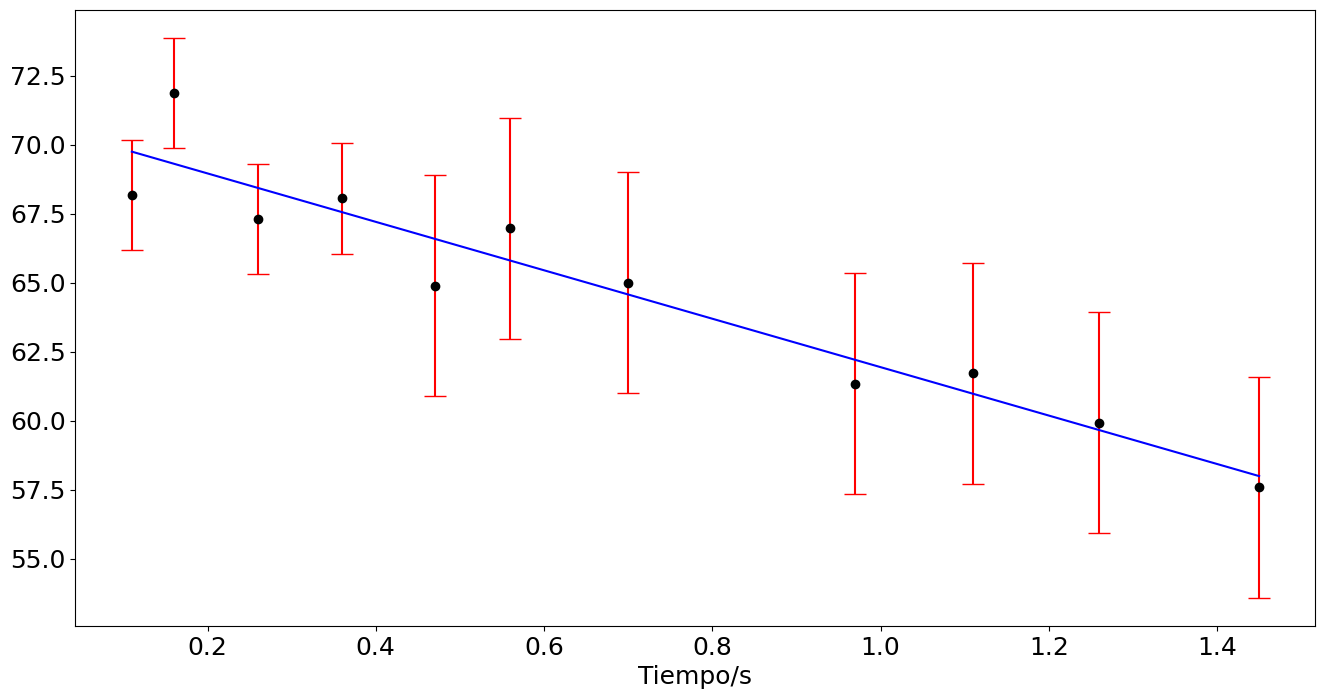

In [1]:
import numpy as np
import pylab as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
# Datos tiempo y posición


t = np.array([2.43,2.48,2.58,2.68,2.79,2.88,3.02,3.29,3.43,3.58,3.77]) - 2.32 # tiempo en segundos
x = np.array([17.0,21.0,27.0,34,40,47,55,69,78,85,93]) - 9.5 # posición en centímetros
e = np.array([0.5,0.5,0.5,0.5,1,1,1,1,1,1,1])*2 # Error estimado en la posición

## Determinación del error del desplazamiento
despM = x + 2*e
despm = x - 2*e
ex = abs(despM - despm)/2
# Linearización suponiendo que sigue la forma x -x0 = v0t -at^2

xnt = (x)/t
exnt = ex

## Mínimos cuadrados
N = len(t)
Sumax = np.sum(t)
Sumay = np.sum(xnt)
Sumax2 = np.sum(t**2)
Sumaxy = np.sum(t*xnt)
Delta = N*Sumax2-Sumax**2
c = (Sumax2*Sumay - Sumax*Sumaxy)/Delta
m = (N*Sumaxy - Sumax*Sumay)/Delta
eCU = np.sqrt((1/(N-2))*np.sum((xnt-m*t-c)**2))
ec = eCU*np.sqrt(Sumax2/Delta)
em = eCU*np.sqrt(N/Delta)

print('pendiente = {} +/- {}'.format(m,em))
print('intercepto = {} +/- {}'.format(c,ec))
print('Incertidumbre común = {}'.format(eCU))

plt.figure(figsize=(16,8))
plt.errorbar(t,xnt,yerr=exnt,fmt='.',ms= 12,capsize=8,ecolor='r',color='k')
plt.plot(t,c + m*t,'b-')
#plt.ylabel('{x/t}$_{cm/s}$')
plt.xlabel('Tiempo/s')
plt.show()

```{figure} imagenes/bola4.png
---
scale: 80%
name: fig-bola4
---
Ajuste de línea recta usando mínimos cuadrados.
```

```{warning}
En el ejemplo anterior se usaron ecuaciones de mínimos cuadrados que consideraban que todas las variables dependientes tenían la misma incertidumbre, lo cuál no es necesariamente el caso real. Un mejor ajuste deberá tener en cuenta la incertidumbre de cada variable dependiente. Las expresiones con esta corrección se encuentran en la {numref}`sec-minimosCuad`. 
```

```{note}
Más sobre graficación de datos experimentales en la sección 5.2 de {cite}`Hughes2010`, en la sección 2.2.3 de {cite}`Mahecha2009`, o en la sección 2.6 de {cite}`Taylor1996`.
```